<a href="https://colab.research.google.com/github/slimf1/ZZ3-DL/blob/main/TP_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk

In [3]:
# Utilisation de TF version 1

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [14]:
# Données (fonction XOR) 
X = [[0,0], [0, 1], [1, 0], [1, 1]]
Y = [[0], [1] ,[1], [0]]

Création du modèle

In [4]:
x_ = tf.placeholder(tf.float32, shape=[None ,2])
y_ = tf.placeholder(tf.float32, shape=[None ,1])
print(x_, y_)

Tensor("Placeholder:0", shape=(?, 2), dtype=float32) Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)


In [5]:
# Nombre de neurones cachés
hidden_units = 3

# Matrice des poids et des biais de la première couche
b1 = tf.Variable(tf.zeros([hidden_units])) # Biais (init à 0)
W1 = tf.Variable(tf.random_uniform([2, hidden_units], -1.0 , 1.0)) # Poids (init aléatoire)

# init_op = tf.global_variables_initializer()

# with tf.Session() as sess: # Spécifique à une session
#   sess.run(init_op)
#   print(sess.run(b1))
#   print(sess.run(W1))

In [6]:
# Activation non linéaire de la couche cachée
# sigma(x^t * w + b)
O = tf.nn.sigmoid(tf.matmul(x_, W1) + b1)

In [7]:
# Matrice des poids et biais de la seconde couche
W2 = tf.Variable(tf.random_uniform([hidden_units, 1], -1.0, 1.0))
b2 = tf.Variable(tf.zeros([1]))

In [8]:
# Sortie du réseau
# matmul = produit tensoriel
y = tf.nn.sigmoid(tf.matmul(O, W2) + b2)


In [9]:
# Fonction de perte quadratique
cost = tf.reduce_sum(tf.square(y_ - y), reduction_indices=[0])
# Optimisation par descente de gradient avec un learning rate de 0.1
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

In [11]:
# Initialisation des variables
init = tf.global_variables_initializer()
# Creation d’une session TF pour executer le programme
with tf.Session() as sess:
  sess.run(init)

Entrainement & évaluation


Itération: 0, Cout = [1.0053581], Precision = 0.50000
Itération: 100, Cout = [1.0011162], Precision = 0.50000
Itération: 200, Cout = [1.0007645], Precision = 0.50000
Itération: 300, Cout = [1.0005084], Precision = 0.50000
Itération: 400, Cout = [1.0003097], Precision = 0.50000
Itération: 500, Cout = [1.0001456], Precision = 0.50000
Itération: 600, Cout = [1.0000005], Precision = 0.50000
Itération: 700, Cout = [0.99986386], Precision = 0.50000
Itération: 800, Cout = [0.9997266], Precision = 0.50000
Itération: 900, Cout = [0.99958056], Precision = 0.50000
Itération: 1000, Cout = [0.9994173], Precision = 0.50000
Itération: 1100, Cout = [0.99922687], Precision = 0.50000
Itération: 1200, Cout = [0.998996], Precision = 0.50000
Itération: 1300, Cout = [0.9987072], Precision = 0.50000
Itération: 1400, Cout = [0.9983341], Precision = 0.50000
Itération: 1500, Cout = [0.9978385], Precision = 0.50000
Itération: 1600, Cout = [0.9971594], Precision = 0.50000
Itération: 1700, Cout = [0.99619913], Pre

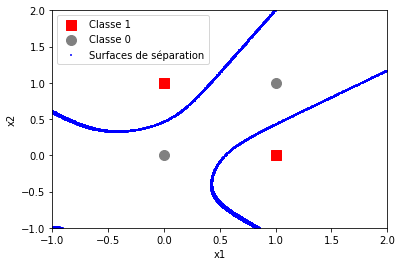

In [18]:
num_iter = 5000

correct_prediction = abs(y_ - y) < 0.5
cast = tf.cast(correct_prediction, "float")
precision = tf.reduce_mean(cast)

# Creation d’une session TF pour executer le programme
with tf.Session() as sess:
  sess.run(init)
  # Nombre d'itérations
  for i in range(num_iter):
    sess.run(train_step, feed_dict={x_: X, y_: Y})
    if i % 100 == 0:
      loss, acc = sess.run([cost, precision], feed_dict={x_: X, y_: Y})
      print(f"Itération: {i}, Cout = {loss}, Precision = {acc:.5f}")

  # VISUALISATION DES RESULTATS
  plt.figure()
  c1 = plt.scatter([1 ,0], [0 ,1] , marker="s", color="red", s=100)
  c0 = plt.scatter([1 ,0], [1 ,0] , marker="o", color="gray", s=100)
  # Generation de points dans [-1,2]x[-1,2]
  DATA_x = (np.random.rand(10**6 ,2)*3) - 1
  DATA_y = sess.run(y, feed_dict={x_: DATA_x})
  # Predictions
  ind = np.where(np.logical_and (0.49 < DATA_y , DATA_y < 0.51))[0]
  DATA_ind = DATA_x[ind]
  # Surfaces de separation
  ss = plt.scatter(DATA_ind[: ,0], DATA_ind[: ,1], marker="_", color="blue", s=2)
  plt.legend((c1, c0, ss), ("Classe 1", "Classe 0", "Surfaces de séparation"), scatterpoints=1)
  plt.xlabel("x1")
  plt.ylabel("x2")
  plt.axis([-1, 2, -1, 2])
  plt.show()